<a href="https://colab.research.google.com/github/davibernardes035/K-means-breast-cancer-wisconsin/blob/main/K_means_breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Utilizando o K-Means para agrupamento de dados

## Base de dados

A base de dados apresentada é um conjunto de dados de câncer de mama Wisconsin do repositório UCI ML, disponível no link:
https://www.kaggle.com/datasets/salihacur/breastcancerwisconsin

As Features podem ser entendidas da seguinte forma:

1.   Sample code number: id number
2.   Clump Thickness: 1 - 10
3.   Uniformity of Cell Size: 1 - 10
4.   Uniformity of Cell Shape: 1 - 10
5.   Marginal Adhesion: 1 - 10
6.   Single Epithelial Cell Size: 1 - 10
7.   Bare Nuclei: 1 - 10
8.   Bland Chromatin: 1 - 10
9.   Normal Nucleoli: 1 - 10
10.  Mitoses: 1 - 10
11.  Class: (2 for benign, 4 for malignant)

O qual 1 é o menor indíce e 10 o maior daquela característica.

A feature "benormal" classifica se o cancêr é maligno ou benigno entre 2 e 4, sendo **2** para **benigno** e **4** para **maligno**







## Importando as bibliotecas e Carregando a base de dados

Visualizando a base da dados

In [ ]:
#Importanto as bibliotecas Python
#--------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#--------------------------------------------------
#--------------------------------------------------
#Carregando o modelo K-Means da biblioteca Scikit-learn
#--------------------------------------------------
from sklearn.cluster import KMeans
#Carregando módulo para ignorar mensagens de Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

localdata = "/content/drive/Shareddrives/IA/Atividade4/breast-cancer-wisconsin.csv"
df = pd.read_csv(localdata)


## Visualização da base da dados

In [ ]:
df.head()

,id,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Manipulação das features
> Retirando os rótulos e features desnecessárias

In [ ]:
feature_colunas = ['clumpthickness','uniformcellsize','uniformcellshape','margadhesion','epithelial','blandchromatin','normalnucleoli','mitoses']
dadosNaoRotulados = df[feature_colunas]
dadosNaoRotulados.head()

,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,blandchromatin,normalnucleoli,mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


## Plotando o gráfico para visualização dos dados no espaço

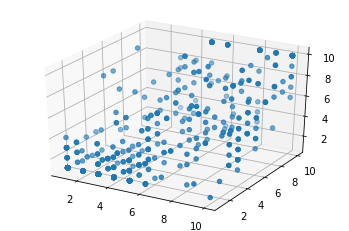

In [ ]:
#Utilizando o pacote Matplotlib para gerar a visualizacao grafica dos dados e verificar o comportamento dos dados sinteticos no espaco
grafico3d = plt.axes(projection='3d')
grafico3d.scatter3D(dadosNaoRotulados.iloc[:, 0], dadosNaoRotulados.iloc[:, 1], dadosNaoRotulados.iloc[:, 2])

## Execução do K-Means

In [ ]:
#Criando uma instancia do K-Means para a divisao dos dados sinteticos em 2 clusters
kmeans = KMeans(n_clusters=2)
#Atribuindo os dados sinteticos, gerados anteriormente a instancia do K-Means e ajustando o modelo para localicar as centroides
kmeans.fit(dadosNaoRotulados)
#Calculando os clusters para os dados nao rotulados e atribuindo os centros em uma nova variavel
saidaRotulos_kmeans = kmeans.predict(dadosNaoRotulados)
centers = kmeans.cluster_centers_

## Dados agrupados após aplicação do K-Means

[1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 

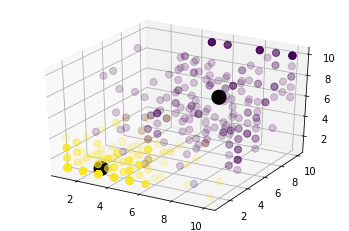

In [ ]:
#Impressao dos rotulos atribuidos pelo K-Means aos dados não rotulados
print(saidaRotulos_kmeans)
#Utilizando as bibliotecas Python para visualisar os clusters formados nos dados sinteticos
graficoResultado3d = plt.axes(projection='3d')
graficoResultado3d.scatter3D(dadosNaoRotulados.iloc[:, 0], dadosNaoRotulados.iloc[:, 1], dadosNaoRotulados.iloc[:, 2], c=saidaRotulos_kmeans, s=50, cmap='viridis',alpha=0.2)
graficoResultado3d.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=200, alpha=1)

## Porcentagem de instâncias em grupos incorretos

In [ ]:
array_benormal = df['benormal'].to_numpy()

contpositive = 0
contnegative = 0

#conversão de valores da feature "benormal" para que os calculos sejam feitos: 2 para 1 e 4 para 0
aux = 0
for i in range (len(array_benormal)):
  if array_benormal[i] == 2:
    array_benormal[aux] = 1
  else:
    array_benormal[aux] = 0
  aux += 1

#Percorrendo os vetores e comparando se o valor oficial é igual ao valor que o K-Means gerou e assim calculando a porcentagem de erro.
for y in range (len(array_benormal)):
  if array_benormal[y] == saidaRotulos_kmeans[y]:
    contpositive += 1
  else:
    contnegative += 1

print("Instâncias em grupos corretos:", contpositive)
print("Instâncias em grupos incorretos:", contnegative)

#Calculo da porcentagem
percentnegative = (100 * contnegative) / 699

print("\n")
print("porcentagem de instâncias que estavam em grupos incorretos:", percentnegative,"%")

Instâncias em grupos corretos: 667
Instâncias em grupos incorretos: 32
porcentagem de instâncias que estavam em grupos incorretos: 4.577968526466381 %



# Utilizando o K-Means para 3 features aleatórias


## Manipulação dos dados

O subconjunto foi escolhido aleatoriamente pelos participantes do grupo

In [ ]:
feature_aleatorias = ['uniformcellsize','margadhesion', 'mitoses']
dadosNaoRotulados2 = df[feature_aleatorias]
dadosNaoRotulados2.head()

,uniformcellsize,margadhesion,mitoses
0,1,1,1
1,4,5,1
2,1,1,1
3,8,1,1
4,1,3,1


## Plotando o gráfico para visualizar os dados no espaço

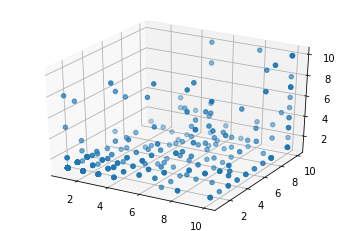

In [ ]:
#Utilizando o pacote Matplotlib para gerar a visualizacao grafica dos dados e verificar o comportamento dos dados sinteticos no espaco
grafico3d = plt.axes(projection='3d')
grafico3d.scatter3D(dadosNaoRotulados2.iloc[:, 0], dadosNaoRotulados2.iloc[:, 1], dadosNaoRotulados2.iloc[:, 2])

## Execução do K-Means para o subconjunto aleatório

In [ ]:
#Criando uma instancia do K-Means para a divisao dos dados sinteticos em 2 clusters
kmeans = KMeans(n_clusters=2)
#Atribuindo os dados sinteticos, gerados anteriormente a instancia do K-Means e ajustando o modelo para localicar as centroides
kmeans.fit(dadosNaoRotulados2)
#Calculando os clusters para os dados nao rotulados e atribuindo os centros em uma nova variavel
saidaRotulos_kmeans2 = kmeans.predict(dadosNaoRotulados2)
centers = kmeans.cluster_centers_

## Visualização dos dados após ser aplicado o K-Means

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

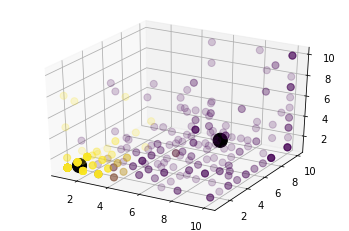

In [ ]:
#Impressao dos rotulos atribuidos pelo K-Means aos dados não rotulados
print(saidaRotulos_kmeans2)
#Utilizando as bibliotecas Python para visualisar os clusters formados nos dados sinteticos
graficoResultado3d = plt.axes(projection='3d')
graficoResultado3d.scatter3D(dadosNaoRotulados2.iloc[:, 0], dadosNaoRotulados2.iloc[:, 1], dadosNaoRotulados2.iloc[:, 2], c=saidaRotulos_kmeans, s=50, cmap='viridis',alpha=0.2)
graficoResultado3d.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=200, alpha=1)

## Porcentagem de instâncias em grupos incorretos

In [ ]:
array_benormal2 = df['benormal'].to_numpy()

contpositive2 = 0
contnegative2 = 0

aux2 = 0
for j in range (len(array_benormal2)):
  if array_benormal2[j] == 2:
    array_benormal2[aux2] = 1
  else:
    array_benormal2[aux2] = 0
  aux2 += 1

for k in range (len(array_benormal2)):
  if array_benormal2[k] == saidaRotulos_kmeans2[k]:
    contpositive2 += 1
  else:
    contnegative2 += 1


print("Instâncias em grupos corretos:", contpositive2)
print("Instâncias em grupos incorretos:", contnegative2)


percentnegative2 = (100 * contnegative2) / 699

print("Porcentagem de instâncias que estavam em grupos incorretos:", percentnegative2,"%")

Instâncias em grupos corretos: 510
Instâncias em grupos incorretos: 189
Porcentagem de instâncias que estavam em grupos incorretos: 27.03862660944206 %





# Subconjunto Reduzido calculado pela média.


## Manipulação dos dados



> Gerando a feature "featuremedia" obtida por meio da média das 3 primeiras features da base de dados, para calcular o K-Means.



In [ ]:
selectionfeatures = ['clumpthickness','uniformcellsize','uniformcellshape']
dfsf = df[selectionfeatures] #dfsf = dataframe selectionfeatures
featuremedia = np.mean(dfsf, axis=1) #feature gerada pela media das 3 primeira features: 'clumpthickness','uniformcellsize','uniformcellshape'
featuremedia = featuremedia.astype(int) #convertendo par int para facilitar a manipulação
print("Media:\n\n", featuremedia)

Media:

 0      2
1      4
2      1
3      7
4      2
      ..
694    1
695    1
696    8
697    6
698    6
Length: 699, dtype: int64




> Selecionando as demais features e a gerada (featuremedia)



In [ ]:
df['featuremedia'] = featuremedia

features = [ 'featuremedia','margadhesion','epithelial','blandchromatin','normalnucleoli','mitoses']
dadosNaoRotulados3 = df[features]
dadosNaoRotulados3.head()

,featuremedia,margadhesion,epithelial,blandchromatin,normalnucleoli,mitoses
0,2,1,2,3,1,1
1,4,5,7,3,2,1
2,1,1,2,3,1,1
3,7,1,3,3,7,1
4,2,3,2,3,1,1


## Plotando o gráfico para visualizar os dados no espaço

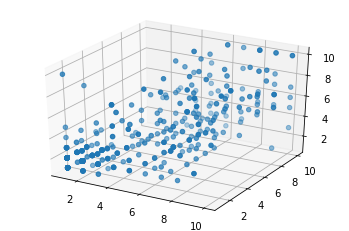

In [ ]:
#Utilizando o pacote Matplotlib para gerar a visualizacao grafica dos dados e verificar o comportamento dos dados sinteticos no espaco
grafico3d = plt.axes(projection='3d')
grafico3d.scatter3D(dadosNaoRotulados3.iloc[:, 0], dadosNaoRotulados3.iloc[:, 1], dadosNaoRotulados3.iloc[:, 2])

## Execução do K-Means para o subconjunto

In [ ]:
#Criando uma instancia do K-Means para a divisao dos dados sinteticos em 2 clusters
kmeans = KMeans(n_clusters=2)
#Atribuindo os dados sinteticos, gerados anteriormente a instancia do K-Means e ajustando o modelo para localicar as centroides
kmeans.fit(dadosNaoRotulados3)
#Calculando os clusters para os dados nao rotulados e atribuindo os centros em uma nova variavel
saidaRotulos_kmeans3 = kmeans.predict(dadosNaoRotulados3)
centers = kmeans.cluster_centers_

## Dados agrupados após execução do K-Means

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

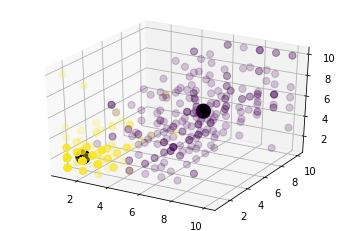

In [ ]:
#Impressao dos rotulos atribuidos pelo K-Means aos dados não rotulados
print(saidaRotulos_kmeans3)
#Utilizando as bibliotecas Python para visualisar os clusters formados nos dados sinteticos
graficoResultado3d = plt.axes(projection='3d')
graficoResultado3d.scatter3D(dadosNaoRotulados3.iloc[:, 0], dadosNaoRotulados3.iloc[:, 1], dadosNaoRotulados3.iloc[:, 2], c=saidaRotulos_kmeans, s=50, cmap='viridis',alpha=0.2)
graficoResultado3d.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=200, alpha=1)

## Porcentagem de instâncias em grupos incorretos

In [ ]:
array_benormal3 = df['benormal'].to_numpy()

contpositive3 = 0
contnegative3 = 0

aux3 = 0
for t in range (len(array_benormal3)):
  if array_benormal3[t] == 2:
    array_benormal3[aux3] = 1
  else:
    array_benormal3[aux3] = 0
  aux3 += 1

for u in range (len(array_benormal3)):
  if array_benormal3[u] == saidaRotulos_kmeans3[u]:
    contpositive3 += 1
  else:
    contnegative3 += 1


print("Instâncias em grupos corretos:", contpositive3)
print("Instâncias em grupos incorretos:", contnegative3)


percentnegative3 = (100 * contnegative3) / 699

print("porcentagem de instâncias que estavam em grupos incorretos:", percentnegative3,"%")

Instâncias em grupos corretos: 485
Instâncias em grupos incorretos: 214
porcentagem de instâncias que estavam em grupos incorretos: 30.61516452074392 %
